In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
def imshow(img, title=""):
    plt.figure(figsize=(8, 8))
    plt.imshow(img, cmap="gray")
    _ = plt.yticks([])
    _ = plt.xticks([])
    plt.title(title)

In [3]:
def imagesc(img, title=""):
    plt.figure(figsize=(8, 8))
    img_rescaled = img / abs(img).max() + abs(img).max() * 0.5
#     print(img_rescaled)
    plt.imshow(img_rescaled, cmap="gray", interpolation="lanczos")
    _ = plt.yticks([])
    _ = plt.xticks([])
    plt.title(title)

In [4]:
img = cv2.imread("../images/pair-color.png")

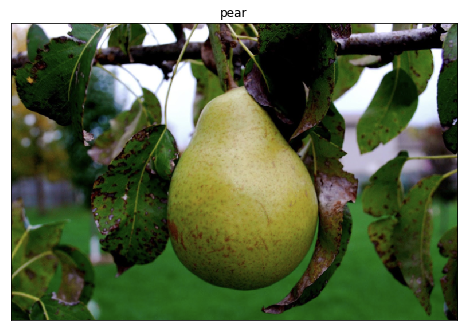

In [5]:
imshow(img[:,:,::-1], "pear")

In [6]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

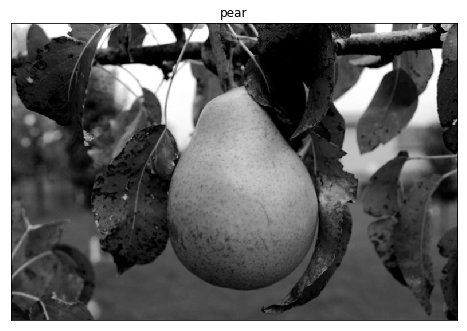

In [7]:
imshow(img_gray, "pear")

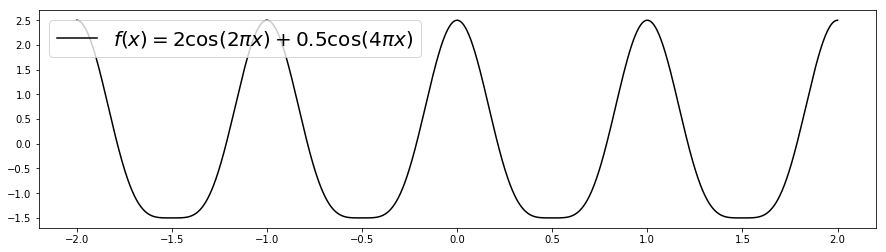

In [8]:
# Wave form used in class
x = np.linspace(-2, 2, 10000)
y = 2*np.cos(2*np.pi*x) + 1/2 * np.cos(4*np.pi*x)
plt.figure(figsize=(15,4))
plt.plot(x,y,"k")
plt.legend(["$f(x) = 2\cos(2\pi x) + 0.5\cos(4\pi x)$"], prop={"size": 20}, loc=2)

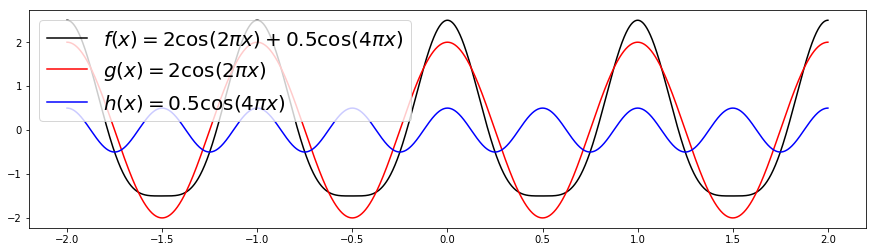

In [9]:
# Wave form used in class
x = np.linspace(-2, 2, 10000)
y = np.stack([
    2*np.cos(2*np.pi*x) + 1/2 * np.cos(4*np.pi*x),
    2*np.cos(2*np.pi*x),
    1/2 * np.cos(4*np.pi*x),
], axis=0)
legend = [
    "$f(x) = 2\cos(2\pi x) + 0.5\cos(4\pi x)$",
    "$g(x) = 2\cos(2\pi x)$",
    "$h(x) = 0.5\cos(4\pi x)$",
]
plt.figure(figsize=(15,4))
plt.plot(x,y[0],"k")
plt.plot(x,y[1],"r")
plt.plot(x,y[2],"b")
plt.legend(legend, prop={"size": 20}, loc=2)

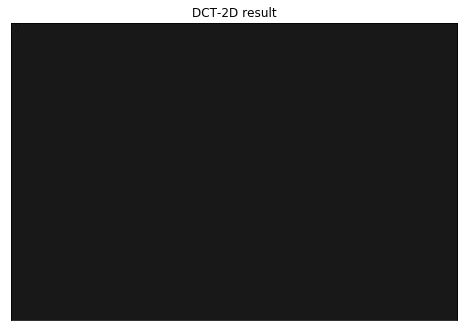

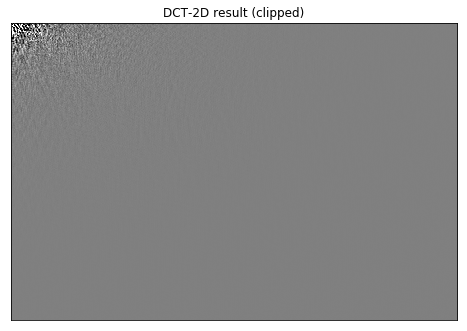

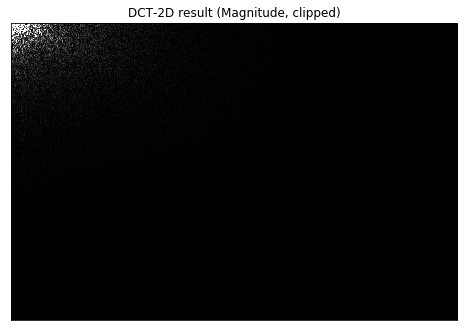

In [10]:
# DCT example
from scipy.fftpack import dct, fftshift
img_dct = dct(dct(img_gray, axis=0), axis=1)
img_res = img_dct
imagesc(img_res, "DCT-2D result")
img_clipped = img_res / img_res.std()
img_clipped = np.maximum(-3, np.minimum(3, img_clipped))
imshow(img_clipped, "DCT-2D result (clipped)")
img_clipped = abs(img_res) / abs(img_res).std()
img_clipped = np.maximum(-3, np.minimum(3, img_clipped))
imshow(abs(img_clipped), "DCT-2D result (Magnitude, clipped)")

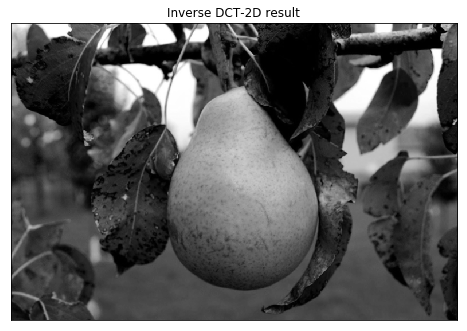

In [11]:
# Inverse DCT example
from scipy.fftpack import idct
img_idct = idct(idct(img_dct, axis=0), axis=1)
imshow(img_idct, "Inverse DCT-2D result")

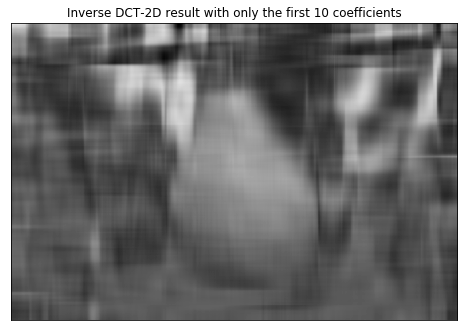

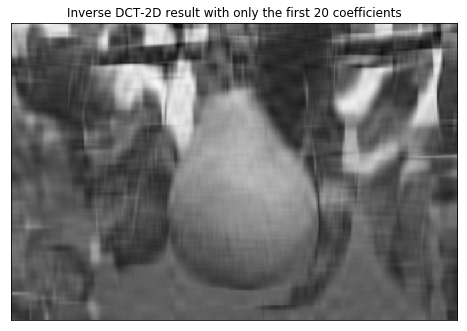

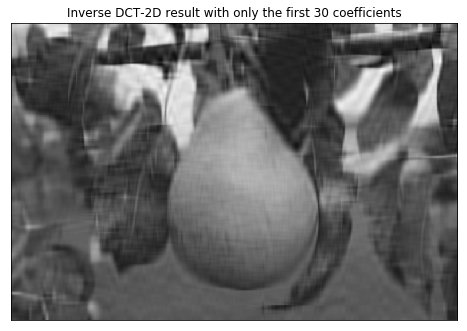

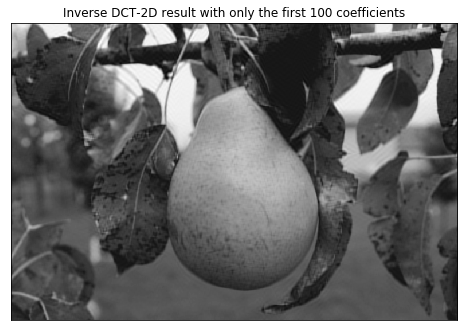

In [12]:
# Inverse DCT example, with coefficients masked
from scipy.fftpack import idct
# Removing some coeeficent (set zero)
img_dct_copy = img_dct.copy()
img_dct_copy[10:,10:] = 0
img_idct = idct(idct(img_dct_copy, axis=0), axis=1)
imshow(img_idct, "Inverse DCT-2D result with only the first 10 coefficients")
# With first 20
img_dct_copy = img_dct.copy()
img_dct_copy[20:,20:] = 0
img_idct = idct(idct(img_dct_copy, axis=0), axis=1)
imshow(img_idct, "Inverse DCT-2D result with only the first 20 coefficients")
# With first 30
img_dct_copy = img_dct.copy()
img_dct_copy[30:,30:] = 0
img_idct = idct(idct(img_dct_copy, axis=0), axis=1)
imshow(img_idct, "Inverse DCT-2D result with only the first 30 coefficients")
# With first 100
img_dct_copy = img_dct.copy()
img_dct_copy[100:,100:] = 0
img_idct = idct(idct(img_dct_copy, axis=0), axis=1)
imshow(img_idct, "Inverse DCT-2D result with only the first 100 coefficients")

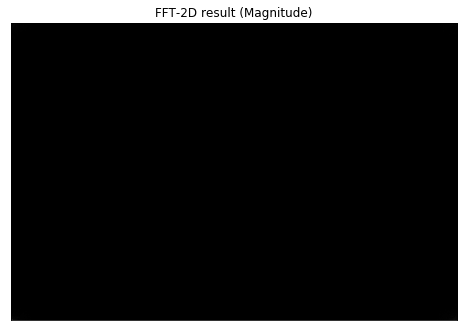

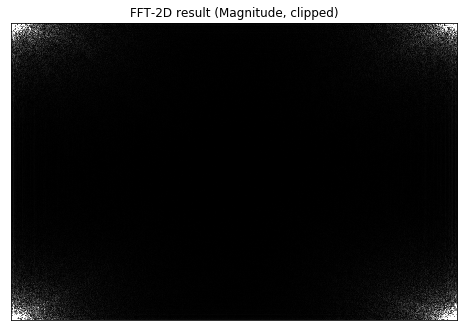

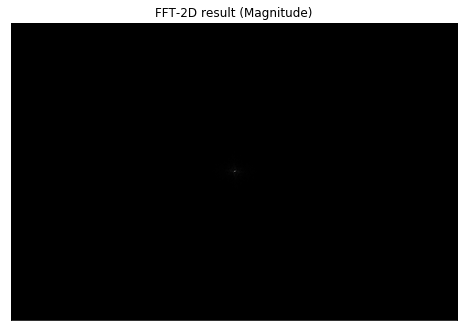

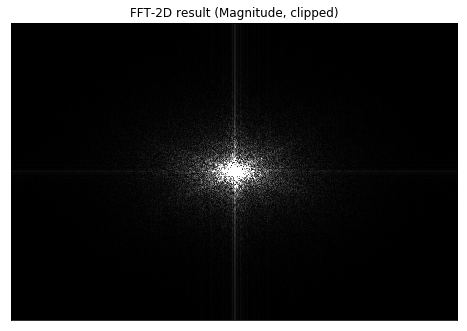

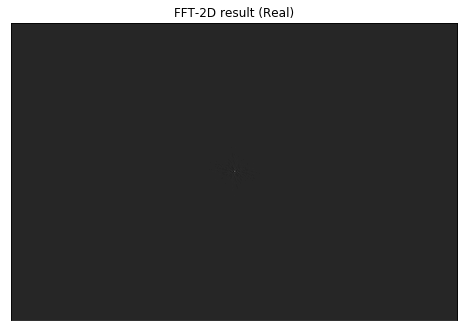

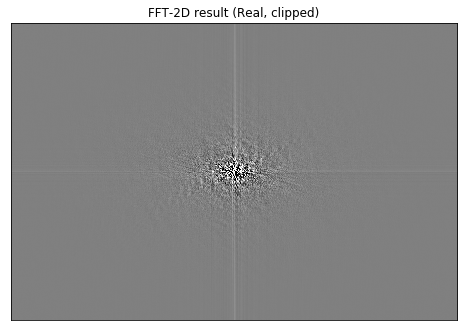

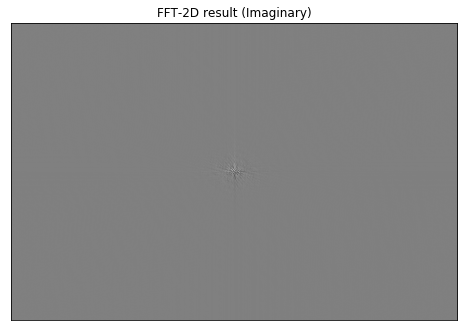

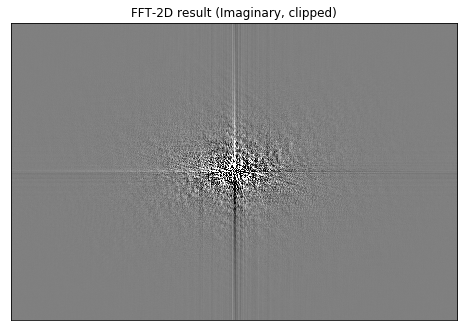

In [13]:
# DFT example
from numpy.fft import fft2
img_fft = fft2(img_gray)

# shift for better visualization
img_res = abs(img_fft)
imagesc(img_res, "FFT-2D result (Magnitude)")
img_clipped = img_res / img_res.std()
img_clipped = np.maximum(-3, np.minimum(3, img_clipped))
imshow(img_clipped, "FFT-2D result (Magnitude, clipped)")

# shift for better visualization
img_fft = fftshift(fftshift(img_fft, axes=0), axes=1)
img_res = abs(img_fft)
imagesc(img_res, "FFT-2D result (Magnitude)")
img_clipped = img_res / img_res.std()
img_clipped = np.maximum(-3, np.minimum(3, img_clipped))
imshow(img_clipped, "FFT-2D result (Magnitude, clipped)")

# For real
img_res = np.real(img_fft)
imagesc(img_res, "FFT-2D result (Real)")
img_clipped = img_res / img_res.std()
img_clipped = np.maximum(-3, np.minimum(3, img_clipped))
imshow(img_clipped, "FFT-2D result (Real, clipped)")

# For imaginary
img_res = np.imag(img_fft)
imagesc(img_res, "FFT-2D result (Imaginary)")
img_clipped = img_res / img_res.std()
img_clipped = np.maximum(-3, np.minimum(3, img_clipped))
imshow(img_clipped, "FFT-2D result (Imaginary, clipped)")



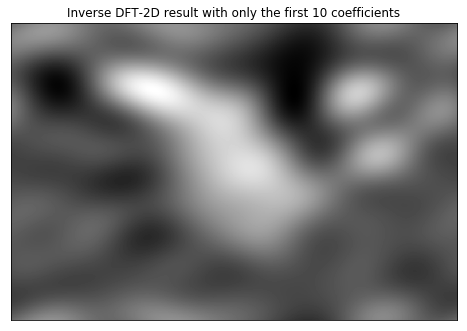

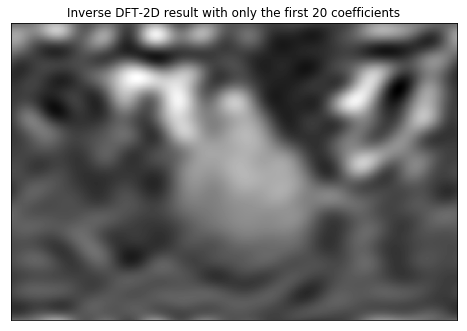

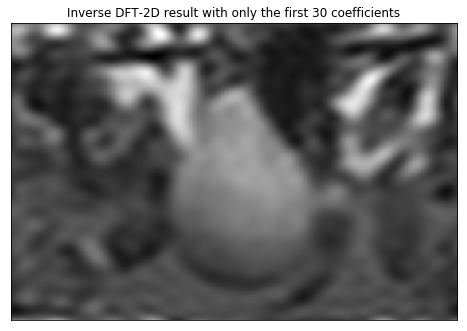

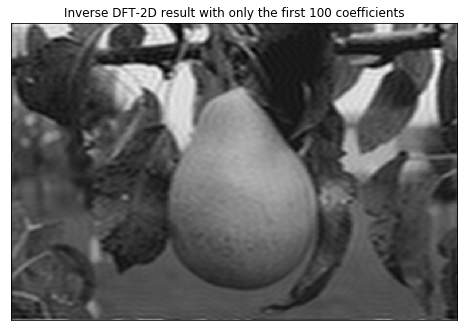

In [14]:
# Inverse DFT example, with coefficients masked
from numpy.fft import ifft2
# Mask for Removing some coeeficent (set zero)
img_fft_copy = img_fft.copy()
mask = np.zeros_like(img_fft_copy)
cx = mask.shape[0] // 2
cy = mask.shape[1] // 2
mask = np.zeros_like(img_fft_copy)
mask[cx-5:cx+5,cy-5:cy+5] = 1
img_fft_copy = fftshift(fftshift(img_fft_copy*mask, axes=0), axes=1)
img_ifft = np.real(ifft2(img_fft_copy)) # ignore imaginary parts when ifft!
imshow(img_ifft, "Inverse DFT-2D result with only the first 10 coefficients")
# With first 20
img_fft_copy = img_fft.copy()
mask = np.zeros_like(img_fft_copy)
mask[cx-10:cx+10,cy-10:cy+10] = 1
img_fft_copy = fftshift(fftshift(img_fft_copy*mask, axes=0), axes=1)
img_ifft = np.real(ifft2(img_fft_copy)) # ignore imaginary parts when ifft!
imshow(img_ifft, "Inverse DFT-2D result with only the first 20 coefficients")
# With first 30
img_fft_copy = img_fft.copy()
mask = np.zeros_like(img_fft_copy)
mask[cx-15:cx+15,cy-15:cy+15] = 1
img_fft_copy = fftshift(fftshift(img_fft_copy*mask, axes=0), axes=1)
img_ifft = np.real(ifft2(img_fft_copy)) # ignore imaginary parts when ifft!
imshow(img_ifft, "Inverse DFT-2D result with only the first 30 coefficients")
# With first 100
img_fft_copy = img_fft.copy()
mask = np.zeros_like(img_fft_copy)
mask[cx-50:cx+50,cy-50:cy+50] = 1
img_fft_copy = fftshift(fftshift(img_fft_copy*mask, axes=0), axes=1)
img_ifft = np.real(ifft2(img_fft_copy)) # ignore imaginary parts when ifft!
imshow(img_ifft, "Inverse DFT-2D result with only the first 100 coefficients")

# DFT and convolution Theorem

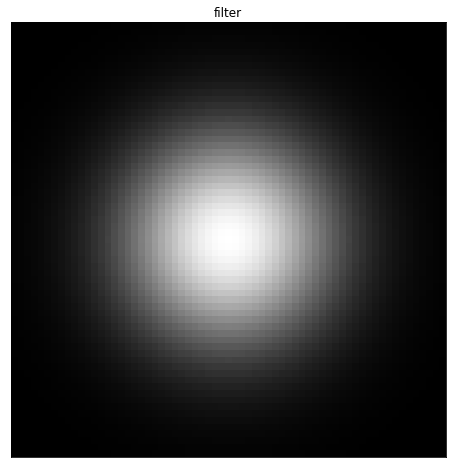

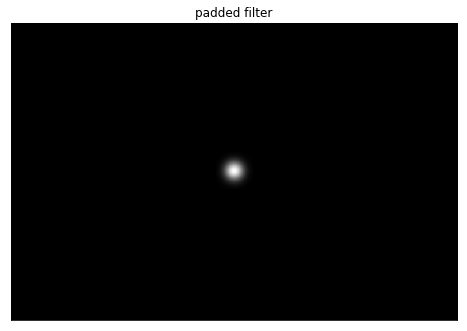

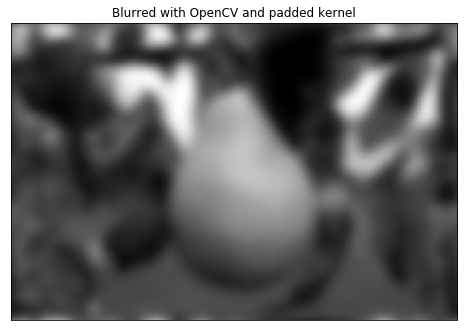

In [15]:
# DFT and Convolution theorem

# Gaussian filter example from examples for filtering
filter1D = cv2.getGaussianKernel(65, 11)
filterG = filter1D * filter1D.T
filterG /= filterG.sum()

imshow(filterG, "filter")

filter_padded = np.zeros_like(img_gray).astype(float)
pad_h = (img_gray.shape[0]  - filterG.shape[0]) // 2
pad_w = (img_gray.shape[1]  - filterG.shape[1]) // 2
filter_padded[pad_h:pad_h+filterG.shape[0], pad_w:pad_w+filterG.shape[1]] = filterG

imshow(filter_padded, "padded filter")

# Gaussian blur example with filtering
img_res = cv2.filter2D(img_gray, cv2.CV_32F, filter_padded, borderType=cv2.BORDER_WRAP)
img_disp = np.maximum(0, np.minimum(255, img_res.astype(int)))
imshow(img_disp, "Blurred with OpenCV and padded kernel")


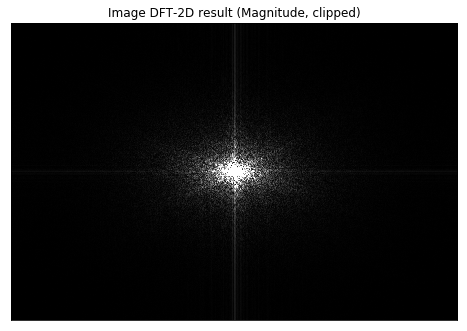

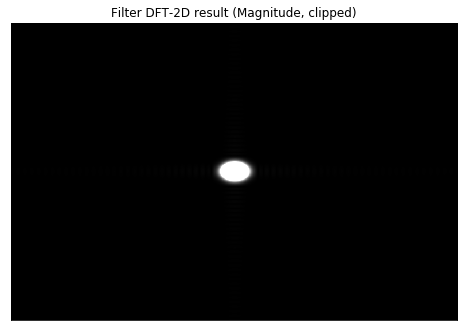

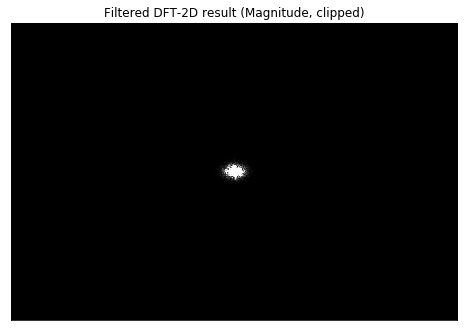

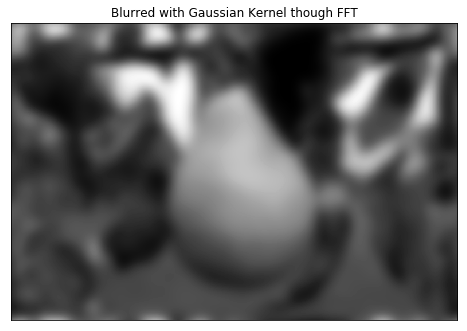

In [16]:
# FFT of the two images
img_fft = fftshift(fft2(img_gray))

filter_padded = np.zeros_like(img_gray).astype(float)
pad_h = (img_gray.shape[0]  - filterG.shape[0]) // 2
pad_w = (img_gray.shape[1]  - filterG.shape[1]) // 2
filter_padded[pad_h:pad_h+filterG.shape[0], pad_w:pad_w+filterG.shape[1]] = filterG
filter_fft = fftshift(fft2(fftshift(filter_padded)))

img_res = abs(img_fft)
img_clipped = img_res / img_res.std()
img_clipped = np.maximum(-3, np.minimum(3, img_clipped))
imshow(img_clipped, "Image DFT-2D result (Magnitude, clipped)")

img_res = abs(filter_fft)
img_clipped = img_res / (img_res.std() + 1e-5)
img_clipped = np.maximum(-3, np.minimum(3, img_clipped))
imshow(img_clipped, "Filter DFT-2D result (Magnitude, clipped)")

img_res = abs(img_fft * filter_fft)
img_clipped = img_res / (img_res.std() + 1e-5)
img_clipped = np.maximum(-3, np.minimum(3, img_clipped))
imshow(img_clipped, "Filtered DFT-2D result (Magnitude, clipped)")

img_filtered = np.real(ifft2(fftshift(img_fft * filter_fft)))
img_disp = np.maximum(0, np.minimum(255, img_filtered.astype(int)))
imshow(img_disp, "Blurred with Gaussian Kernel though FFT")

# Manipulating the image in Fourier Space

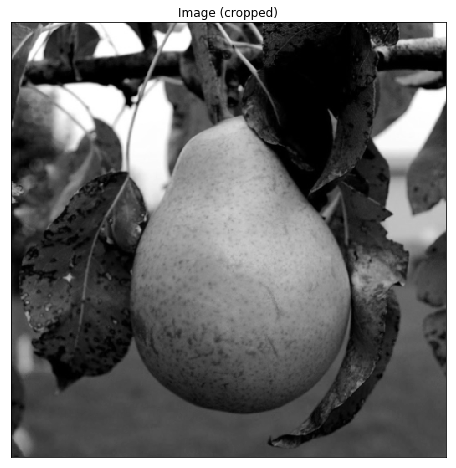

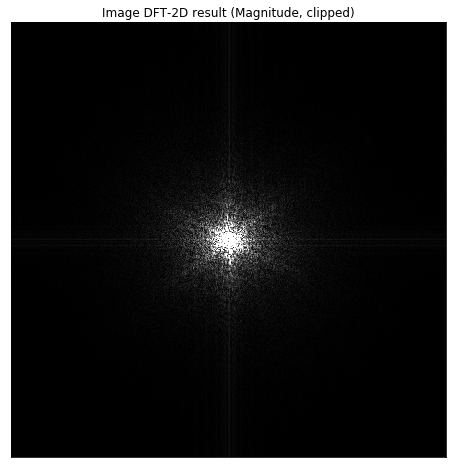

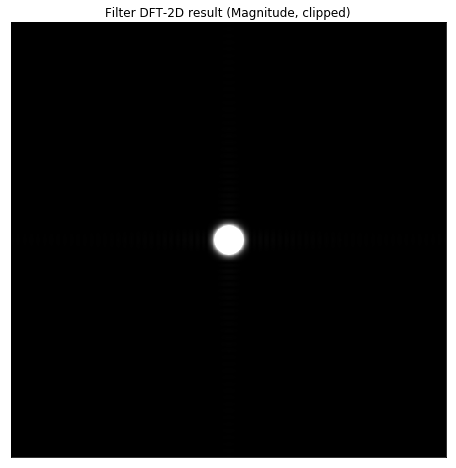

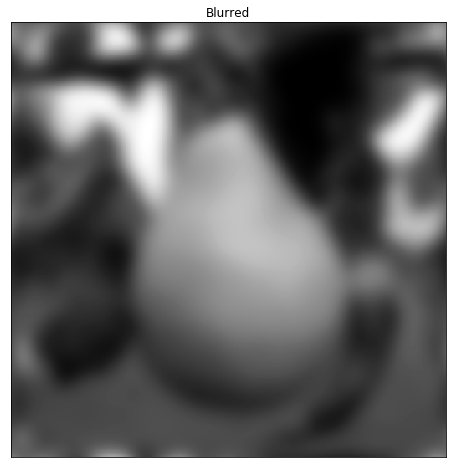

In [17]:
# Crop image in center
h, w = img_gray.shape
half_crop = int((w - h) * 0.5)
img_crop = img_gray[:, half_crop:half_crop+h]

imshow(img_crop, "Image (cropped)")


# FFT of the image
img_fft = fftshift(fft2(img_crop))

# FFT of the filter
filter_padded = np.zeros_like(img_crop).astype(float)
pad_h = (img_crop.shape[0]  - filterG.shape[0]) // 2
pad_w = (img_crop.shape[1]  - filterG.shape[1]) // 2
filter_padded[pad_h:pad_h+filterG.shape[0], pad_w:pad_w+filterG.shape[1]] = filterG
filter_fft = fftshift(fft2(fftshift(filter_padded))) #fftshift since anchor is top-left in fft

img_res = abs(img_fft)
img_clipped = img_res / img_res.std()
img_clipped = np.maximum(-3, np.minimum(3, img_clipped))
imshow(img_clipped, "Image DFT-2D result (Magnitude, clipped)")

img_res = abs(filter_fft)
img_clipped = img_res / (img_res.std() + 1e-5)
img_clipped = np.maximum(-3, np.minimum(3, img_clipped))
imshow(img_clipped, "Filter DFT-2D result (Magnitude, clipped)")

img_filtered = np.real((ifft2(fftshift(img_fft * filter_fft))))
img_disp = np.maximum(0, np.minimum(255, img_filtered.astype(int)))
imshow(img_disp, "Blurred")

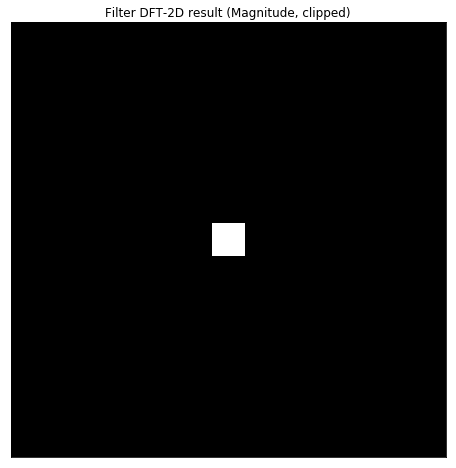

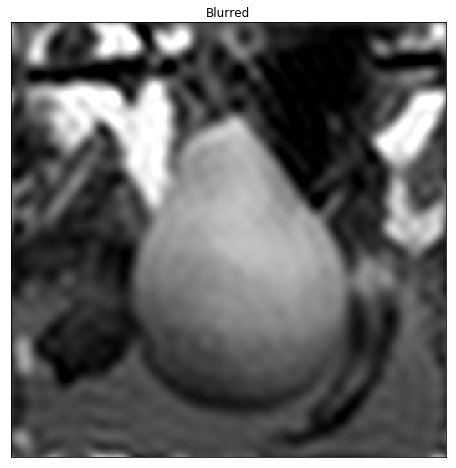

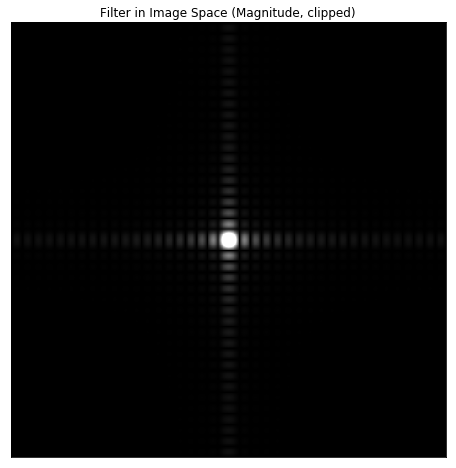

In [18]:
# Handcrafted ideal low-pass filter
filter_fft = fftshift(fft2(filter_padded))
filter_lpf = np.zeros_like(filter_padded)
bw = 20
# cv2.circle(filter_lpf, (260, 260), 10, 1.0, -1)
filter_lpf[520//2-bw:520//2+bw, 520//2-bw:520//2+bw] = 1.0
filter_lpf = filter_lpf.astype(np.complex)

img_res = abs(filter_lpf)
img_clipped = img_res / (img_res.std() + 1e-5)
img_clipped = np.maximum(-3, np.minimum(3, img_clipped))
imshow(img_clipped, "Filter DFT-2D result (Magnitude, clipped)")

img_filtered = np.real(ifft2(fftshift(img_fft * filter_lpf)))
img_disp = np.maximum(0, np.minimum(255, img_filtered.astype(int)))
imshow(img_disp, "Blurred")

dw = 50
img_lpf = fftshift(ifft2(fftshift(filter_lpf))) * 100000
# img_filter = img_filter[520//2-dw:520//2+dw, 520//2-dw:520//2+dw]
img_disp = np.maximum(0, np.minimum(255, abs(img_lpf).astype(int)))
imshow(img_disp, "Filter in Image Space (Magnitude, clipped)")


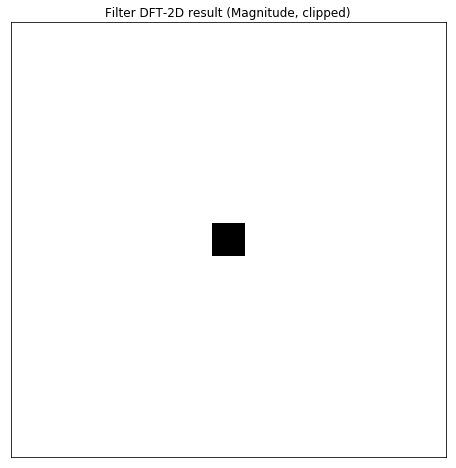

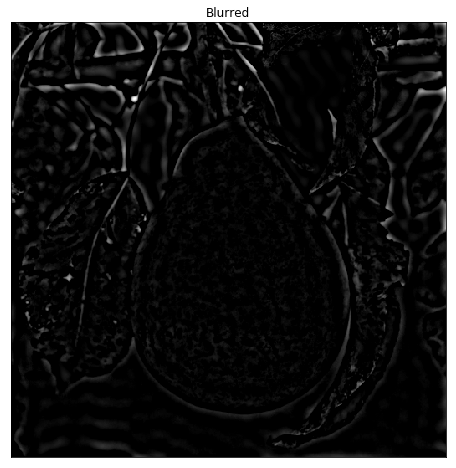

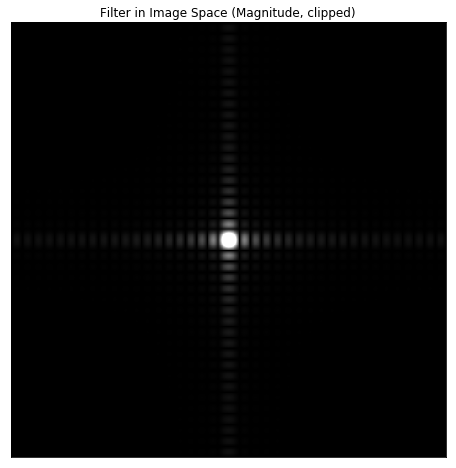

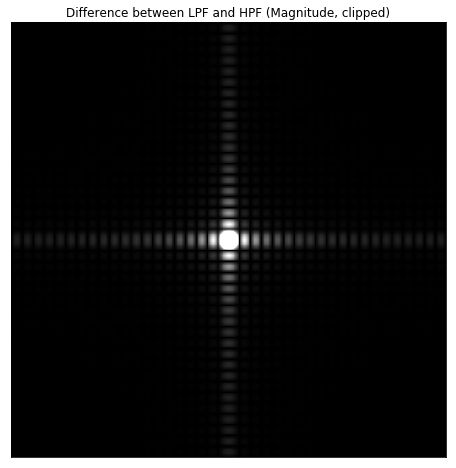

In [19]:
# Handcrafted ideal high-pass filter
filter_fft = fftshift(fft2(filter_padded))
filter_hpf = np.ones_like(filter_fft)
bw = 20
filter_hpf[520//2-bw:520//2+bw, 520//2-bw:520//2+bw] = 0.0

img_res = abs(filter_hpf)
img_clipped = img_res / (img_res.std() + 1e-5)
img_clipped = np.maximum(-3, np.minimum(3, img_clipped))
imshow(img_clipped, "Filter DFT-2D result (Magnitude, clipped)")

img_filtered = np.real(ifft2(fftshift(img_fft * filter_hpf)))
img_disp = np.maximum(0, np.minimum(255, img_filtered.astype(int)))
imshow(img_disp, "Blurred")

dw = 50
img_hpf = fftshift(ifft2(fftshift(filter_hpf))) * 100000
# img_filter = img_filter[520//2-dw:520//2+dw, 520//2-dw:520//2+dw]
img_disp = np.maximum(0, np.minimum(255, abs(img_hpf).astype(int)))
imshow(img_disp, "Filter in Image Space (Magnitude, clipped)")

dw = 50
img_diff = img_lpf - img_hpf
# img_filter = img_filter[520//2-dw:520//2+dw, 520//2-dw:520//2+dw]
img_disp = np.maximum(0, np.minimum(255, abs(img_diff).astype(int)))
imshow(img_disp, "Difference between LPF and HPF (Magnitude, clipped)")

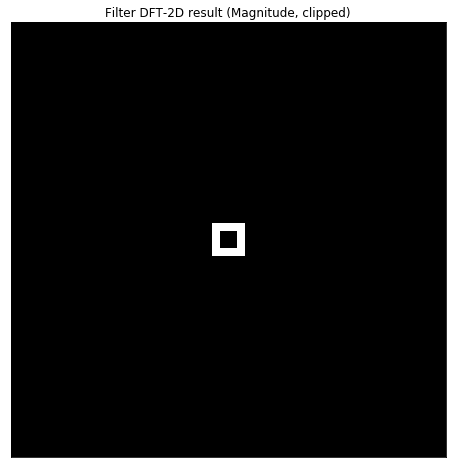

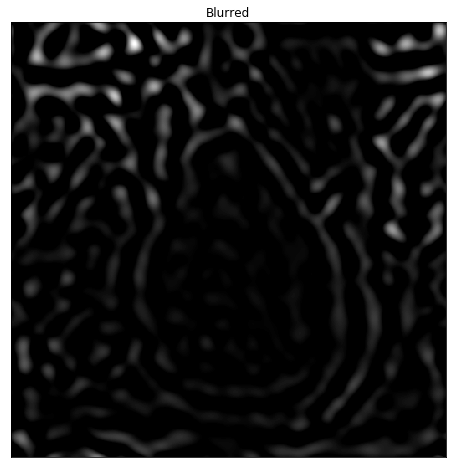

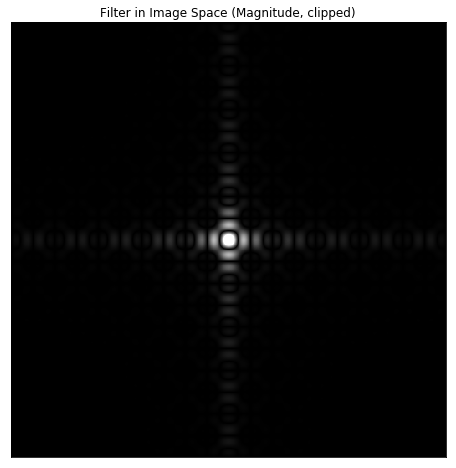

In [20]:
# Handcrafted ideal band-pass filter
filter_fft = fftshift(fft2(filter_padded))
filter_bpf = np.zeros_like(filter_fft)
bw = 20
filter_bpf[520//2-bw:520//2+bw, 520//2-bw:520//2+bw] = 1.0
bw = 10
filter_bpf[520//2-bw:520//2+bw, 520//2-bw:520//2+bw] = 0.0


img_res = abs(filter_bpf)
img_clipped = img_res / (img_res.std() + 1e-5)
img_clipped = np.maximum(-3, np.minimum(3, img_clipped))
imshow(img_clipped, "Filter DFT-2D result (Magnitude, clipped)")

img_filtered = np.real(ifft2(fftshift(img_fft * filter_bpf)))
img_disp = np.maximum(0, np.minimum(255, img_filtered.astype(int)))
imshow(img_disp, "Blurred")

dw = 50
filter_bpf = fftshift(ifft2(fftshift(filter_bpf))) * 100000
# img_filter = img_filter[520//2-dw:520//2+dw, 520//2-dw:520//2+dw]
img_disp = np.maximum(0, np.minimum(255, abs(filter_bpf).astype(int)))
imshow(img_disp, "Filter in Image Space (Magnitude, clipped)")



# Gibbs phenomenon example

(-0.5, 2.5)

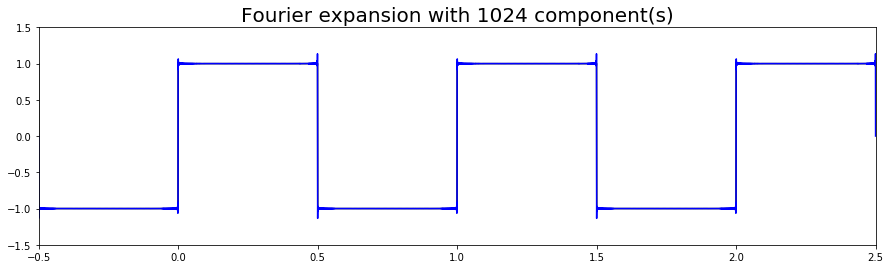

In [21]:

N = 1024

x = np.linspace(-0.5, 2.5, 10000)
y = (((x - np.floor(x)) <= 0.5) * 2 - 1).astype(np.float)
plt.figure(figsize=(15,4))
plt.plot(x,y,"k")
y = np.zeros_like(y)
for n in range(N):
    K = 2 * n + 1
    y += ( 1/K*np.sin(x*K*2*np.pi) ) / (np.pi / 4)
plt.plot(x,y,"b")
# legend = [
#     "Square wave",
#     "Fourier expansion with {} component(s)".format(N),
# ]
# plt.legend(legend, prop={"size": 20}, loc=2)
plt.title("Fourier expansion with {} component(s)".format(N), fontsize=20)
plt.ylim([-1.5, 1.5])
plt.xlim([-0.5, 2.5])